In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os  
from glob import glob
import sys 
import pygsp
from importlib import reload
from pathlib import Path
import json
from datetime import datetime


from gsp_neuro import data_loading as dload
from gsp_neuro import consensus_connectome as cconn

In [4]:
data_base_dir = "/Users/hugofluhr/chuv/data/BIOPSYCHO_CTRLS/"
subject_ids_lut = "/Users/hugofluhr/chuv/data/Ids.csv"
subject_ids = [sub.get('subjID') for sub in dload.get_ids_csv(subject_ids_lut)]
subject_folders = [subfolder for subfolder in glob(data_base_dir + "sub-*") if subfolder[-8:] in subject_ids]

In [8]:
nbins = 50
for scale in [1, 2, 3, 4, 5] : 
    print("----- Working on scale {} -----".format(scale))

    df_coords = dload.read_coords(scale=scale)
    coords = df_coords[['XCoord(mm)','YCoord(mm)','ZCoord(mm)']].to_numpy()
    distances = cconn.distance_matrix(coords)
    print('      Coordinates loaded')

    connectomes_paths = dload.get_sub_connectomes_paths(subject_folders, scale = scale)
    Nsub = len(connectomes_paths)
    print('      {} connectomes found'.format(Nsub))

    connectomes = np.zeros((distances.shape + (Nsub,)))
    for i,conn_path in enumerate(connectomes_paths):
        conn = dload.load_connectome(conn_path, field='fibDensity')
        connectomes[...,i] = conn
    print('      Connectomes loaded')

    G, Gc, av_weight = cconn.fcn_group_bins(connectomes, distances, nbins=nbins)

    print('      Saving....')
    out_dir = os.path.join(data_base_dir,'consensus/')
    if not os.path.isdir(out_dir):
        os.mkdir(out_dir)
    out_np_path = os.path.join(out_dir,"consensus_scale{}.npz".format(scale))
    out_meta_path = os.path.join(out_dir,"consensus_scale{}.json".format(scale))

    meta_data = {"timestamp":str(datetime.now()), "nbins":nbins,"connectomes_used":connectomes_paths}
    with open(out_meta_path, "w+") as outfile:
        json.dump(meta_data, outfile)

    np.savez(out_np_path, G=G,Gc=Gc,av_weight=av_weight)
    print('      Done! \n')

----- Working on scale 1 -----
      Coordinates loaded
      66 connectomes found
      Connectomes loaded
      Saving....
      Done! 

----- Working on scale 2 -----
      Coordinates loaded
      66 connectomes found
      Connectomes loaded
      Saving....
      Done! 

----- Working on scale 3 -----
      Coordinates loaded
      66 connectomes found
      Connectomes loaded
      Saving....
      Done! 

----- Working on scale 4 -----
      Coordinates loaded
      66 connectomes found
      Connectomes loaded
      Saving....
      Done! 

----- Working on scale 5 -----
      Coordinates loaded
      66 connectomes found
      Connectomes loaded
      Saving....
      Done! 



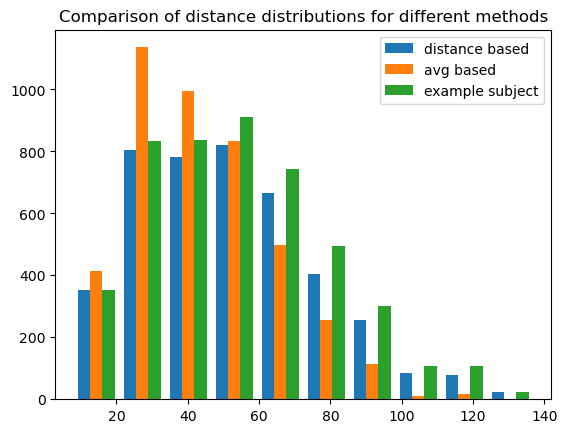

In [83]:
plt.hist([distances[np.nonzero(G)], distances[np.nonzero(Gc)], distances[np.nonzero(connectomes[...,2])]])
plt.legend(['distance based','avg based','example subject'])
plt.title('Comparison of distance distributions for different methods')
plt.show()